<a href="https://colab.research.google.com/github/AmirNBA9/MachineLearning/blob/master/Examin-Num01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ابتدا بايد ديتاست را بخوانيم

In [767]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/ML/modified-dataset.csv')

# تعداد رديف و ستون ها را بدست ميآوريم.
print(len(data))
print(len(data.columns))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
395
26


In [768]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school        388 non-null    object 
 1   sex           389 non-null    object 
 2   age           389 non-null    float64
 3   address       385 non-null    object 
 4   famsize       387 non-null    object 
 5   Pstatus       387 non-null    object 
 6   Medu          392 non-null    float64
 7   Fedu          387 non-null    float64
 8   Mjob          387 non-null    object 
 9   Fjob          387 non-null    object 
 10  guardian      383 non-null    object 
 11  traveltime    392 non-null    float64
 12  studytime     387 non-null    float64
 13  failures      387 non-null    float64
 14  Ssupport      388 non-null    object 
 15  Gsupport      390 non-null    object 
 16  feespaid      383 non-null    object 
 17  ecactivities  387 non-null    object 
 18  internet      386 non-null    

In [769]:
data.head(400)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,feespaid,ecactivities,internet,freetime,goout,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,...,no,no,no,3.0,4.0,3.0,6.0,5.0,NaN,6.0
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,...,no,no,yes,3.0,3.0,3.0,4.0,5.0,5.0,6.0
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,yes,no,yes,3.0,2.0,3.0,10.0,7.0,8.0,10.0
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,...,yes,yes,yes,2.0,2.0,5.0,2.0,15.0,14.0,15.0
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,...,yes,no,no,NaN,2.0,5.0,4.0,6.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20.0,U,LE3,A,2.0,2.0,services,services,...,yes,no,no,5.0,4.0,4.0,11.0,9.0,9.0,9.0
391,MS,M,17.0,U,LE3,T,3.0,1.0,services,services,...,no,no,yes,4.0,5.0,2.0,3.0,14.0,16.0,16.0
392,MS,M,21.0,R,GT3,T,1.0,1.0,other,other,...,no,no,no,5.0,3.0,3.0,NaN,10.0,8.0,7.0
393,MS,M,18.0,R,LE3,T,3.0,2.0,services,other,...,no,no,yes,4.0,1.0,5.0,0.0,11.0,12.0,10.0


#توضيحات در خصوص ديتاست
 اين ديتاست شامل 395 سطر و 26 ستون است. كه از گوگل درايو خوانده ميشود.

 ## مقادير تهي
 باتوجه به وجود ديتا تهي، بنحوي بايد مشكل مقادير تهي را در اين ديتاست مرتفع نمود.
  طبق بررسي ها همه ستون ها مقادير تهي دارند.

In [770]:
# بررسي اينكه چه ستون هايي مقدار تهي دارند
# 1. يافتن ليستي از نام هاي ستون ها
list = []
for col in data.columns:
    list.append(col)
# 2. بررسي نام تعداد تهي در ستون ها
data[list].isnull().sum()

school           7
sex              6
age              6
address         10
famsize          8
Pstatus          8
Medu             3
Fedu             8
Mjob             8
Fjob             8
guardian        12
traveltime       3
studytime        8
failures         8
Ssupport         7
Gsupport         5
feespaid        12
ecactivities     8
internet         9
freetime         9
goout           12
health           8
absences         9
G1               5
G2              11
G3               7
dtype: int64

# Data cleansing
## پر كردن مقادير تهي
## تبديل كردن داده هاي متني به عددي

In [771]:
# Copy School for label
data['school_label'] = data['school']
data['school'].fillna( method ='ffill', inplace = True)

In [772]:
data['sex'] = data['sex'].replace(['F','M'],[0,1])
data['feespaid'] = data['feespaid'].replace(['no','yes'],[0,1])
data['ecactivities'] = data['ecactivities'].replace(['no','yes'],[0,1])
data['internet'] = data['internet'].replace(['no','yes'],[0,1])
data['school'] = data['school'].replace(['GP','MS'],[0,1])
data['famsize'] = data['famsize'].replace(['GT3','LE3'],[0,1])
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,ecactivities,internet,freetime,goout,health,absences,G1,G2,G3,school_label
0,0,0.0,18.0,U,0.0,A,4.0,4.0,at_home,teacher,...,0.0,0.0,3.0,4.0,3.0,6.0,5.0,NaN,6.0,GP
1,0,0.0,17.0,U,0.0,T,1.0,1.0,at_home,other,...,0.0,1.0,3.0,3.0,3.0,4.0,5.0,5.0,6.0,GP
2,0,0.0,15.0,U,1.0,T,1.0,1.0,at_home,other,...,0.0,1.0,3.0,2.0,3.0,10.0,7.0,8.0,10.0,GP
3,0,0.0,15.0,U,0.0,T,4.0,2.0,health,services,...,1.0,1.0,2.0,2.0,5.0,2.0,15.0,14.0,15.0,GP
4,0,0.0,16.0,U,0.0,T,3.0,3.0,other,other,...,0.0,0.0,NaN,2.0,5.0,4.0,6.0,10.0,10.0,GP
5,0,1.0,16.0,U,1.0,T,4.0,NaN,services,other,...,1.0,NaN,4.0,2.0,5.0,10.0,15.0,15.0,15.0,GP
6,0,1.0,16.0,U,1.0,T,2.0,2.0,other,other,...,0.0,1.0,4.0,4.0,3.0,0.0,12.0,12.0,11.0,GP
7,0,0.0,17.0,U,0.0,A,4.0,4.0,other,teacher,...,0.0,0.0,1.0,4.0,1.0,NaN,6.0,5.0,6.0,GP
8,0,1.0,15.0,U,1.0,A,3.0,2.0,services,other,...,0.0,1.0,2.0,2.0,1.0,0.0,16.0,NaN,19.0,GP
9,0,1.0,15.0,U,0.0,T,3.0,4.0,other,other,...,1.0,1.0,5.0,1.0,5.0,0.0,14.0,15.0,15.0,GP


In [773]:
data["Fedu"].fillna( method ='ffill', inplace = True)
data["Medu"].fillna( method ='ffill', inplace = True)
data["Fedu"].fillna( method ='ffill', inplace = True)
data["G1"].fillna( method ='ffill', inplace = True)
data["G3"].fillna( method ='ffill', inplace = True)
data["feespaid"].fillna( method ='ffill', inplace = True)
data["ecactivities"].fillna( method ='ffill', inplace = True)
data["freetime"].fillna( method ='ffill', inplace = True)
data["goout"].fillna( method ='ffill', inplace = True)
data["health"].fillna( method ='ffill', inplace = True)
data["sex"].fillna( method ='ffill', inplace = True)
data["age"].fillna( method ='ffill', inplace = True)
data["address"].fillna( method ='ffill', inplace = True)
data["famsize"].fillna( method ='ffill', inplace = True)
data["Pstatus"].fillna( method ='ffill', inplace = True)
data["guardian"].fillna( method ='ffill', inplace = True)
data["traveltime"].fillna( method ='ffill', inplace = True)
data["studytime"].fillna( method ='ffill', inplace = True)
data["failures"].fillna( method ='ffill', inplace = True)
data["Ssupport"].fillna( method ='ffill', inplace = True)
data["Gsupport"].fillna( method ='ffill', inplace = True)
data["absences"].fillna( method ='ffill', inplace = True)
data["Mjob"].fillna( method ='ffill', inplace = True)
data["Fjob"].fillna( method ='ffill', inplace = True)

data.head(7)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,ecactivities,internet,freetime,goout,health,absences,G1,G2,G3,school_label
0,0,0.0,18.0,U,0.0,A,4.0,4.0,at_home,teacher,...,0.0,0.0,3.0,4.0,3.0,6.0,5.0,NaN,6.0,GP
1,0,0.0,17.0,U,0.0,T,1.0,1.0,at_home,other,...,0.0,1.0,3.0,3.0,3.0,4.0,5.0,5.0,6.0,GP
2,0,0.0,15.0,U,1.0,T,1.0,1.0,at_home,other,...,0.0,1.0,3.0,2.0,3.0,10.0,7.0,8.0,10.0,GP
3,0,0.0,15.0,U,0.0,T,4.0,2.0,health,services,...,1.0,1.0,2.0,2.0,5.0,2.0,15.0,14.0,15.0,GP
4,0,0.0,16.0,U,0.0,T,3.0,3.0,other,other,...,0.0,0.0,2.0,2.0,5.0,4.0,6.0,10.0,10.0,GP
5,0,1.0,16.0,U,1.0,T,4.0,3.0,services,other,...,1.0,NaN,4.0,2.0,5.0,10.0,15.0,15.0,15.0,GP
6,0,1.0,16.0,U,1.0,T,2.0,2.0,other,other,...,0.0,1.0,4.0,4.0,3.0,0.0,12.0,12.0,11.0,GP


# پر کردن دیتا با استفاده از روش KNN

در این روش از دیتاهای نزدیک یا همسایه استفاده میشود. که در این تمرین فقط یک مورد را با این مدل پر میکنیم.

In [774]:
from sklearn.impute import KNNImputer as knn

imputer = knn(n_neighbors=2)
data['internet'] = imputer.fit_transform(data['internet'].values.reshape(-1, 1)) #knn fill

data.head(7)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,ecactivities,internet,freetime,goout,health,absences,G1,G2,G3,school_label
0,0,0.0,18.0,U,0.0,A,4.0,4.0,at_home,teacher,...,0.0,0.000000,3.0,4.0,3.0,6.0,5.0,NaN,6.0,GP
1,0,0.0,17.0,U,0.0,T,1.0,1.0,at_home,other,...,0.0,1.000000,3.0,3.0,3.0,4.0,5.0,5.0,6.0,GP
2,0,0.0,15.0,U,1.0,T,1.0,1.0,at_home,other,...,0.0,1.000000,3.0,2.0,3.0,10.0,7.0,8.0,10.0,GP
3,0,0.0,15.0,U,0.0,T,4.0,2.0,health,services,...,1.0,1.000000,2.0,2.0,5.0,2.0,15.0,14.0,15.0,GP
4,0,0.0,16.0,U,0.0,T,3.0,3.0,other,other,...,0.0,0.000000,2.0,2.0,5.0,4.0,6.0,10.0,10.0,GP
5,0,1.0,16.0,U,1.0,T,4.0,3.0,services,other,...,1.0,0.829016,4.0,2.0,5.0,10.0,15.0,15.0,15.0,GP
6,0,1.0,16.0,U,1.0,T,2.0,2.0,other,other,...,0.0,1.000000,4.0,4.0,3.0,0.0,12.0,12.0,11.0,GP


# Median

In [775]:
data['G2'].fillna(data['G2'].median , inplace=True) # median

list = []
for col in data.columns:
    list.append(col)
# 2. بررسي نام تعداد تهي در ستون ها
data[list].isnull().sum()

school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
guardian        0
traveltime      0
studytime       0
failures        0
Ssupport        0
Gsupport        0
feespaid        0
ecactivities    0
internet        0
freetime        0
goout           0
health          0
absences        0
G1              0
G2              0
G3              0
school_label    7
dtype: int64

# بررسی دیتا کلین شده

In [776]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school        395 non-null    int64  
 1   sex           395 non-null    float64
 2   age           395 non-null    float64
 3   address       395 non-null    object 
 4   famsize       395 non-null    float64
 5   Pstatus       395 non-null    object 
 6   Medu          395 non-null    float64
 7   Fedu          395 non-null    float64
 8   Mjob          395 non-null    object 
 9   Fjob          395 non-null    object 
 10  guardian      395 non-null    object 
 11  traveltime    395 non-null    float64
 12  studytime     395 non-null    float64
 13  failures      395 non-null    float64
 14  Ssupport      395 non-null    object 
 15  Gsupport      395 non-null    object 
 16  feespaid      395 non-null    float64
 17  ecactivities  395 non-null    float64
 18  internet      395 non-null    

تا اینجا همه دیتاهای تهی تعیین تکلیف شدند
به سراغ حل ميرويم

از مپ، مديان و ديكشنري هم ميتوان استفاده نمود.

#ترسيم توزيع ديتا

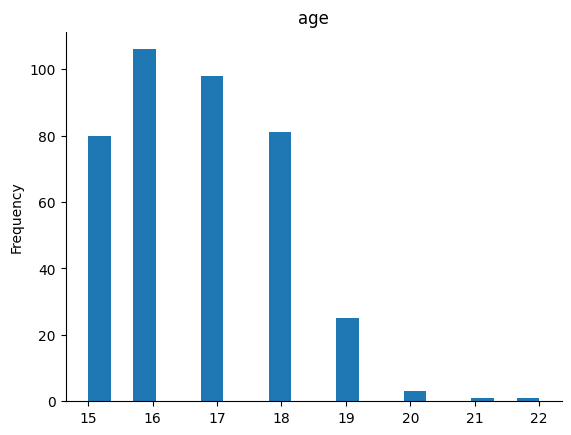

In [777]:
from matplotlib import pyplot as plt

data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [778]:
# یک مپينگ از برچسب مدرسه به نام ليبل مدرسه ایجاد كرده تا تفسیر نتایج را آسان تر شود
look_up_school_name = dict(zip(data.school.unique(), data.school_label.unique()))
look_up_school_name # اين نشد، فرصت نشد ايراداش رو رفع كنم

{0: 'GP', 1: nan}

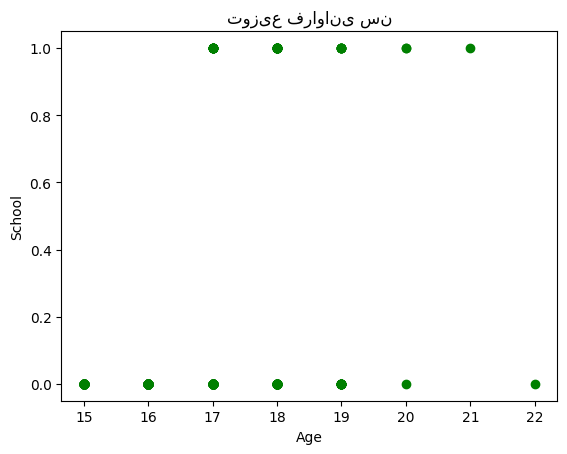

In [779]:
plt.scatter(data['age'], data['school'], color='green')
plt.title('توزیع فراوانی سن')
plt.ylabel('School') # 0=GP 1=MS
plt.xlabel('Age')
plt.show()

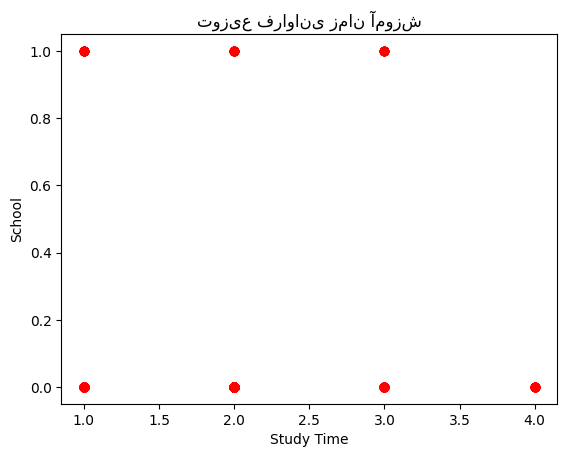

In [780]:
plt.scatter(data['studytime'], data['school'], color='red')
plt.title('توزیع فراوانی زمان آموزش')
plt.ylabel('School') # 0=GP 1=MS
plt.xlabel('Study Time')
plt.show()

#بررسي تعداد و انواع مدارس

In [781]:
unique_schools = data['famsize'].unique()
#print(unique_schools)

counts = data['famsize'].value_counts()
print(counts)

unique_schools = data['school'].unique()
#print(unique_schools)

counts = data['school'].value_counts()
print(counts)

0.0    279
1.0    116
Name: famsize, dtype: int64
0    349
1     46
Name: school, dtype: int64


# ساخت پلات

روش های محتلفی برای پلات کردن داریم، اما برای نمایش زیباتر و قابل فهم تر از هیستوگراف استفاده میکنیم. اما سایر موارد را کامنت کردم که وجود داشته باشد.

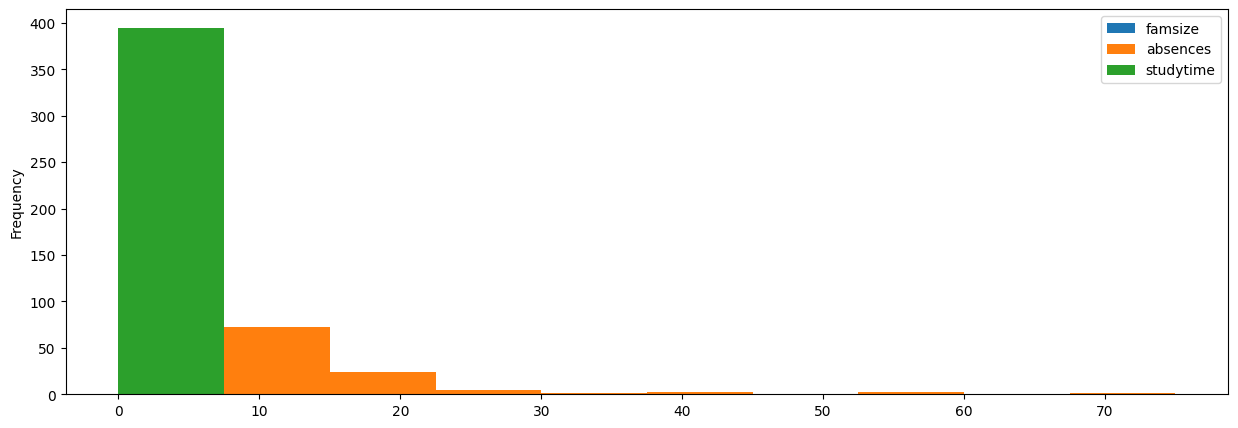

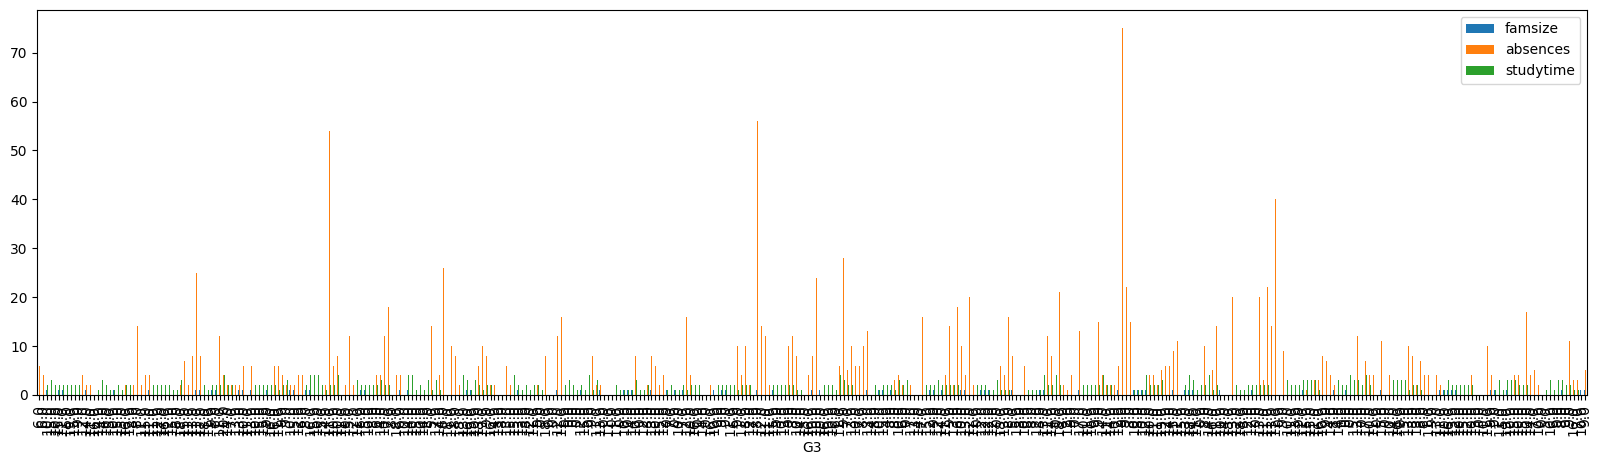

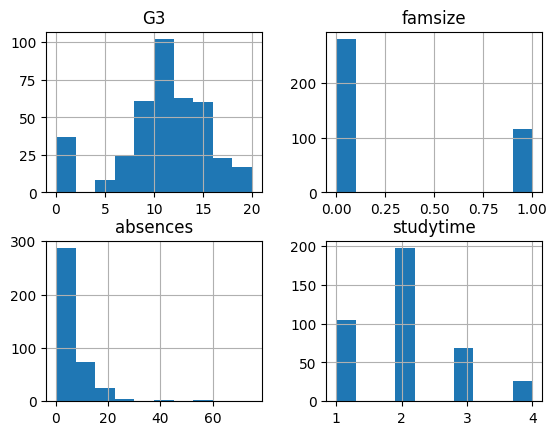

In [782]:
df = pd.DataFrame(data, columns=["G3","famsize", "absences", "studytime"])

# plot the dataframe
df.plot(x="G3", y=["famsize","absences", "studytime"], kind="hist", figsize=(15, 5))

# print bar graph
plt.show()

df = pd.DataFrame(data, columns=["G3","famsize", "absences", "studytime"])

# Plot the dataframe as a bar graph
df.plot(x="G3", y=["famsize","absences", "studytime"], kind="bar", figsize=(20, 5))

# Show the bar graph
plt.show()

# Plot histograms for each column separately
df.hist(column=["G3", "famsize", "absences", "studytime"])

# Show the histograms
plt.show()

# با استفاده از الگوریتم Regression Linear یک مدل یادگیری ماشین را مرحله به مرحله طبق زیر آموزش دهید



In [783]:
from sklearn.model_selection import train_test_split

# بايد مقادير آرايه اي باشند
x = data['absences'].replace(['no','yes'],[0,1]).to_numpy().reshape(-1,1)
y = data['G3'].to_numpy().reshape(-1,1)

# چهار ورودي ميگيرد
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33)

print(x.shape)
print(y.shape)

(395, 1)
(395, 1)


## خواندن پارامتر ها
1. **fit_interceptbool, default=True**
  * Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).
2. **copy_Xbool, default=True**
  * If True, X will be copied; else, it may be overwritten.
3. **n_jobsint, default=None**
  * The number of jobs to use for the computation. This will only provide speedup in case of sufficiently large problems, that is if firstly n_targets > 1 and secondly X is sparse or if positive is set to True. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

4. **positivebool, default=False**
  * When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.

In [784]:
#linear regression
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

score_reg = lr_model.score(x_test, y_test)
print("score regression:",score_reg)

score regression: -0.007596814124415152


كشف دقت

In [785]:
from sklearn.metrics import mean_squared_error, r2_score

# پیش‌بینی مقادیر
x_pred = lr_model.predict(x_test)
y_pred = lr_model.predict(y_test)

# محاسبه دقت
linear_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:",linear_mse)

Mean Squared Error: 23.190141203539117


In [786]:
lr_model.coef_

array([[0.00080642]])

In [787]:
lr_model.intercept_

array([10.57098319])

# نمایش خروجی

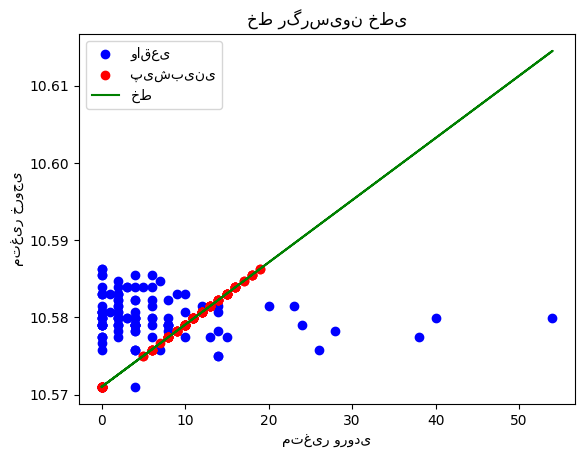

In [788]:
import matplotlib.pyplot as plt

# رسم نقاط واقعی
plt.scatter(x_test, y_pred, color='blue', label='واقعی')

# رسم نقاط پیش‌بینی شده
plt.scatter(y_test, y_pred, color='red', label='پیش‌بینی')

# رسم خط بر اساس معادله خطی
plt.plot(x_test, lr_model.coef_ * x_test + lr_model.intercept_, color='green', label='خط')

# تنظیمات نمودار
plt.xlabel('متغیر ورودی')
plt.ylabel('متغیر خروجی')
plt.title('خط رگرسیون خطی')
plt.legend()

# نمایش نمودار
plt.show()

# Ridge Regression

In [789]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.5)  # مقدار alpha به صورت دستی تعیین می‌شود
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.5)

In [790]:
# محاسبه میانگین مربعات خطا
ridge_mse = mean_squared_error(y_test, y_pred)

# محاسبه ضریب تعیین
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", ridge_mse)
print("R-squared:", r2)

Mean Squared Error: 23.190141203539117
R-squared: -0.0062809766157116975


# Lasso


In [791]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.4)  # مقدار alpha به صورت دستی تعیین می‌شود
lasso_model.fit(x_train, y_train)


Lasso(alpha=0.4)

In [792]:
# پیش‌بینی خروجی با استفاده از مدل
y_pred = lasso_model.predict(x_test)

# محاسبه mean squared error
lasso_mse = mean_squared_error(y_test, y_pred)

# محاسبه ضریب تعیین
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", lasso_mse)
print("R-squared:", r2)

Mean Squared Error: 23.2243952361926
R-squared: -0.007767348825739928


برای مقایسه دقت سه مدل Linear Regression، Lasso Regression و Ridge Regression، می‌توانید از نمودار میله ای (bar plot) استفاده کنید. در این نمودار، میزان دقت هر مدل را میانگین مربعات خطا (MSE) یا ضریب تعیین (R-squared) را روی محور عمودی نمایش دهید.

بعد از محاسبه مقدار MSE یا R-squared برای هر مدل با استفاده از داده‌های تست، می‌توانید این مقادیر را به یک لیست اضافه کنید و سپس این لیست را به تابع bar در کتابخانه matplotlib پاس دهید.

در ادامه کدی نمونه آورده شده است که نحوه ترسیم نمودار میله ای برای مقایسه دقت سه مدل را نشان می دهد:

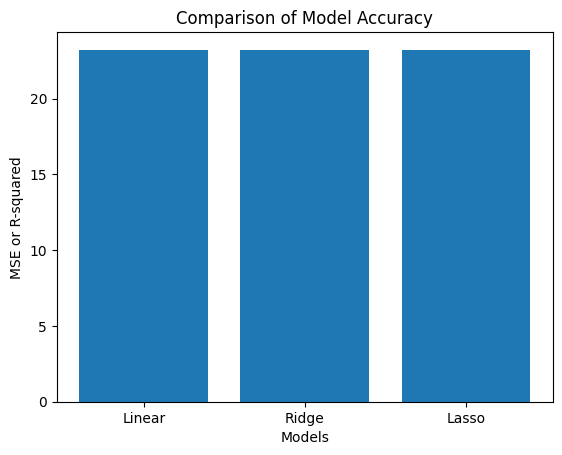

In [793]:
import matplotlib.pyplot as plt

# لیست مقادیر MSE یا R-squared
values = [linear_mse, ridge_mse, lasso_mse]

# نام مدل‌ها
models = ['Linear', 'Ridge', 'Lasso']

# ترسیم نمودار میله ای
plt.bar(models, values)
plt.xlabel('Models')
plt.ylabel('MSE or R-squared')
plt.title('Comparison of Model Accuracy')
plt.show()

در این کد، ابتدا مقادیر MSE یا R-squared هر سه مدل را به صورت دستی تعیین می‌کنیم و در لیست values قرار می‌دهیم. همچنین نام مدل‌ها را در لیست models قرار می‌دهیم. سپس با استفاده از تابع bar در کتابخانه matplotlib، نمودار میله ای را ترسیم می‌کنیم. در نهایت محورها و عنوان نمودار تعیین می‌شوند و نمودار نشان داده می‌شود.

# K fold

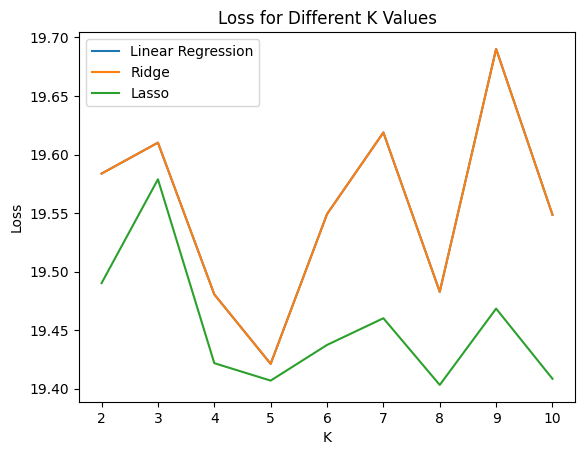

In [794]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
}

k_values = range(2, 11)
losses = {}

for model_name, model in models.items():
    model_losses = []
    for k in k_values:
        kf = KFold(n_splits=k)
        fold_losses = []
        for train_index, val_index in kf.split(x_train):
            x_fold_train, x_fold_val = x_train[train_index], x_train[val_index]
            y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]

            model.fit(x_fold_train, y_fold_train)
            y_val_pred = model.predict(x_fold_val)
            fold_loss = mean_squared_error(y_fold_val, y_val_pred)
            fold_losses.append(fold_loss)

        model_losses.append(np.mean(fold_losses))

    losses[model_name] = model_losses

# پلات کردن مقادیر loss
for model_name, model_losses in losses.items():
    plt.plot(k_values, model_losses, label=model_name)
    # if model_name == 'Linear Regression':
    #   plt.plot(k_values, model_losses, label=model_name, color='blue')
    # else:
    #   plt.plot(k_values, model_losses, label=model_name)


# تنظیم محورها و عنوان نمودار
plt.xlabel('K')
plt.ylabel('Loss')
plt.title('Loss for Different K Values')
plt.legend()

plt.show()

در این کد، یک دیکشنری با نام models تعریف شده است که شامل سه مدل Linear Regression ، Ridge و Lasso است. سپس با استفاده از یک حلقه تکرار، مدل را به ازای مقادیر K از 1 تا 10 آموزش داده و مقدار loss را محاسبه می‌کنیم. سپس، مقادیر loss برای هر مدل را در یک دیکشنری به نام losses ذخیره می‌کنیم. درنهایت، با استفاده از plt.plot، مقادیر loss را برای هر مدل به صورت جداگانه رسم می‌کنیم.

با اجرای این کد، نمودار loss برای مقادیر K از 1 تا 10 برای سه مدل Linear Regression، Ridge و Lasso رسم می‌شود.

# مساله دوم طبقه بندي

## مطالعه ديتا
ابتدا بايد ديتا را مشاهده نمود و در خصوص آن مواردي را ذكر كرد.

In [795]:
fruits = pd.read_table('/content/drive/MyDrive/ML/fruit-data-with-colors.txt')

fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [796]:
# یک مپينگ از برچسب میوه به نام میوه ایجاد كرده تا تفسیر نتایج را آسان تر شود
look_up_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
look_up_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [797]:
# تعداد رديف و ستون ها را بدست ميآوريم.
fruits.shape

(59, 7)

In [798]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


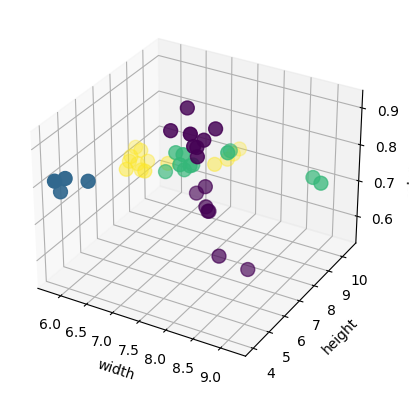

In [799]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

# Split the data into training and testing
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [800]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# آموزش مدل:
model = LogisticRegression()
model.fit(X_train, y_train)

# تقسیم داده‌ها به دو بخش آموزشی و تست با نسبت 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [801]:
# ارزيابي
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)

print('accuracy is:',accuracy)

accuracy is: 0.9166666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


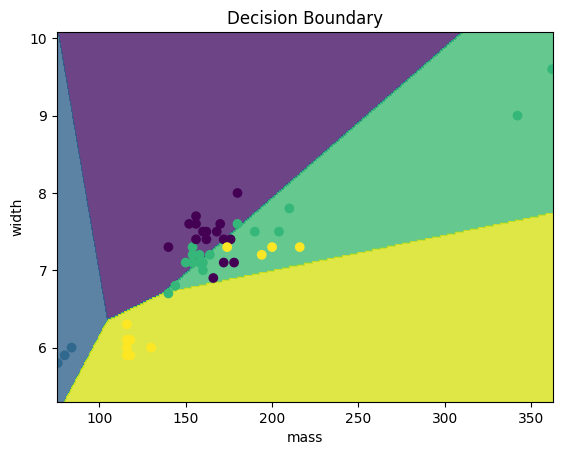

In [802]:
# آموزش مدل رگرسیون لجستیک
model.fit(X_train[['mass', 'width']], y_train)

# تعیین محدوده و دقت تصویر
h = 0.02
x_min, x_max = X_train['mass'].min() - 0.5, X_train['mass'].max() + 0.5
y_min, y_max = X_train['width'].min() - 0.5, X_train['width'].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# پیش‌بینی برچسب‌ها برای نقاط در مرز تصمیم
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# رسم مرز تصمیم
plt.contourf(xx, yy, Z, alpha=0.8)

# رسم داده‌های آموزش با برچسب‌های واقعی
plt.scatter(X_train['mass'], X_train['width'], c=y_train)

# تنظیم محورها و عنوان نمودار
plt.xlabel('mass')
plt.ylabel('width')
plt.title('Decision Boundary')

plt.show()


# گزارش دقت

In [803]:
accuracy = model.score(X_test[['mass', 'width']], y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6666666666666666
